In [1]:
from tensorflow import keras
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import glob 
import numpy as np
from os import listdir,makedirs
from os.path import isfile,join
from numpy import *
from PIL import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import random
import cv2
import os 



Using TensorFlow backend.


In [2]:
path_2="/home/dashan/Desktop/modified_data"

IMG_SIZE=300

def label_img(name):
	if name[0:2]=="NL":
		return np.array([1,0,0,0])
	elif name[0:2]=="ca":
		return np.array([0,1,0,0])
	elif name[0:2]=="Gl":
		return np.array([0,0,1,0])
	else:
		return np.array([0,0,0,1])
def load_training_data(arg):
	train_data=[]
	DIR=path_2+"/"+arg
	for img in os.listdir(DIR):
		label=label_img(img)
		path=os.path.join(DIR,img)
		img=Image.open(path)
		img=img.convert('L')
		img.resize((IMG_SIZE,IMG_SIZE),Image.ANTIALIAS)
		train_data.append([np.array(img),label])
		flip_img=Image.open(path)
		flip_img=flip_img.convert('L')
		flip_img = flip_img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
		flip_img = np.array(flip_img)
		flip_img = np.fliplr(flip_img)
		train_data.append([flip_img, label])
	shuffle(train_data)
	return train_data
a=load_training_data("1_normal")
b=load_training_data("2_cataract")
c=load_training_data("2_glaucoma")
d=load_training_data("3_retina_disease")
# print(len(a),len(b),len(c),len(d))

train_data=[]
for i in a[0:200]:
	train_data.append(i)
shuffle(train_data)
for i in b[0:200]:
	train_data.append(i)
shuffle(train_data)
for i in c[0:200]:
	train_data.append(i)
shuffle(train_data)
for i in d[0:200]:
	train_data.append(i)
shuffle(train_data)
# image = PIL.Image.open("sample.png")

[[array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 1, 0, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
  array([1, 0, 0, 0])],
 [array([[1, 0, 1, ..., 0, 0, 0],
         [1, 0, 1, ..., 0, 0, 0],
         [1, 0, 1, ..., 0, 0, 0],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 0],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
  array([1, 0, 0, 0])],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 1, 1, 1],
         [0, 0, 0, ..., 0, 0, 1],
         ...,
         [1, 2, 0, ..., 1, 1, 1],
         [0, 1, 2, ..., 1, 1, 1],
         [0, 1, 0, ..., 1, 1, 1]], dtype=uint8),
  array([1, 0, 0, 0])],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         ...,
         [1, 0, 0, ..., 0, 0, 1],
         [0, 0, 0, ..., 1, 0, 0],
         [0, 0, 0, ..., 1, 0, 0]], dtype=uint

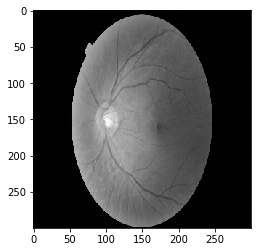

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_data[43][0], cmap = 'gist_gray')

In [18]:
# IMG_SIZE=288
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization

# IMG_SIZE=300
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print("compile to ho gya ")
model.summary()

compile to ho gya 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 149, 149, 32)      128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 73, 73, 64)        256       
_________________________________________________________________
conv2d_18 (Conv2D)           (None,

In [27]:
# model.fit(trainImages, trainLabels, batch_size = 10, epochs = 5, verbose = 1)
# model.save("model_100_epochs.h5")

In [28]:
from sklearn.model_selection import train_test_split
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(trainImages, trainLabels, test_size=0.125,random_state=1234)

In [29]:
x_train = np.asarray(x_train_o.tolist())
x_test = np.asarray(x_test_o.tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [30]:
# from keras.utils.np_utils import to_categorical
# y_train = to_categorical(y_train_o, num_classes = 4)
# y_test = to_categorical(y_test_o, num_classes = 4)
# print(len(y_train),len(y_test))
y_train=y_train_o
y_test=y_test_o

In [31]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.14285714285714285, random_state = 2)
print(len(x_train),len(x_validate))

600 100


In [32]:
history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(x_validate, y_validate),verbose=1)

Train on 600 samples, validate on 100 samples
Epoch 1/100
600/600 [==============================] - 72s 120ms/step - loss: 1.6056 - accuracy: 0.3150 - val_loss: 1.8039 - val_accuracy: 0.2000
Epoch 2/100
600/600 [==============================] - 71s 118ms/step - loss: 1.2956 - accuracy: 0.3550 - val_loss: 4.8664 - val_accuracy: 0.2000
Epoch 3/100
600/600 [==============================] - 74s 123ms/step - loss: 1.2570 - accuracy: 0.3983 - val_loss: 5.2328 - val_accuracy: 0.2000
Epoch 4/100
600/600 [==============================] - 76s 127ms/step - loss: 1.2375 - accuracy: 0.4400 - val_loss: 4.5422 - val_accuracy: 0.2000
Epoch 5/100
600/600 [==============================] - 77s 129ms/step - loss: 1.2257 - accuracy: 0.4317 - val_loss: 6.2741 - val_accuracy: 0.2000
Epoch 6/100
580/600 [============================>.] - ETA: 2s - loss: 1.1157 - accuracy: 0.4586

KeyboardInterrupt: 

In [24]:
loss_v, accuracy_v = model.evaluate(x_test, y_test, verbose=1)

100/100 [==============================] - 4s 44ms/step


In [25]:
print("Test: accuracy = %f  ;  loss = %f" % (accuracy_v, loss_v))

Test: accuracy = 0.580000  ;  loss = 1.532308
